<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(context='talk', style='whitegrid', palette='muted')

#Q-Q-plot
import statsmodels.api as sm

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# YOUR CODE

#Случайные строчки
display(data.sample(10, random_state=42))

#Вывод info
print(data.info())
print()

#Количество NaN в столбцах
df_nans = (
    data.isna().sum() #Считаем сколько пропусков в каждом столбце
    .sort_values(ascending=False) #Сортируем по убыванию
    .to_frame('num_nan')
)
df_nans['rate'] = (df_nans['num_nan'] / data.shape[0]).map(lambda x: '{:.2%}'.format(x)) #Количество пропусков в процентах
display(df_nans)

#Дубликаты
print()
print('Количество повторяющихся строк:', data.duplicated().sum())

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
1942,39,50.75,2011.4,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1859,52,79.20,4016.3,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,0
2348,1,74.40,74.4,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2280,6,50.80,288.05,Female,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),1
733,21,68.65,1493.2,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

,num_nan,rate
ClientPeriod,0,0.00%
MonthlySpending,0,0.00%
PaymentMethod,0,0.00%
IsBillingPaperless,0,0.00%
HasContractPhone,0,0.00%
HasMovieSubscription,0,0.00%
HasOnlineTV,0,0.00%
HasTechSupportAccess,0,0.00%
HasDeviceProtection,0,0.00%
HasOnlineBackup,0,0.00%



Количество повторяющихся строк: 14


Пропусков в данных нет. Удалим дубликаты.

In [6]:
data = data.drop_duplicates().reset_index(drop=True)
print('Количество повторяющихся строк:', data.duplicated().sum())
print()
data.info()

Количество повторяющихся строк: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   object 
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      52

Тип столбца TotalSpent определися как object, хотя по смыслу должен быть числовым. Попробуем заменить тип на float.

In [7]:
try:
    data['TotalSpent'] = data['TotalSpent'].astype('float')
except:
    print('В столбце не только числа.')

В столбце не только числа.


Если посмотреть ошибку при попытке изменить тип, выясняется, что в TotalSpent есть значения ' '. Фактически это пропуски в данных. Возможно, это означает, что клиент ничего не тратил, потому и нет никакой записи. Можно перемножить для таких объектов значения ClientPeriod и MonthlySpending для восстановления значения. Или заменить пропуски на 0. Посмотрим на эти строчки.

In [8]:
data.loc[data['TotalSpent'] == ' ', num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
1048,0,25.75,
1704,0,73.35,
2538,0,19.70,
3070,0,80.85,
3688,0,20.00,
3992,0,61.90,
4315,0,25.35,
4538,0,52.55,
4585,0,56.05,


У всех этих клиентов ClientPeriod=0. Заменим пропуски в TotalSpent на 0 и преобразуем тип данных. Также реобразуем тип категориальных признаков в category.

In [9]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', 0).astype('float')
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ClientPeriod              5268 non-null   int64   
 1   MonthlySpending           5268 non-null   float64 
 2   TotalSpent                5268 non-null   float64 
 3   Sex                       5268 non-null   category
 4   IsSeniorCitizen           5268 non-null   category
 5   HasPartner                5268 non-null   category
 6   HasChild                  5268 non-null   category
 7   HasPhoneService           5268 non-null   category
 8   HasMultiplePhoneNumbers   5268 non-null   category
 9   HasInternetService        5268 non-null   category
 10  HasOnlineSecurityService  5268 non-null   category
 11  HasOnlineBackup           5268 non-null   category
 12  HasDeviceProtection       5268 non-null   category
 13  HasTechSupportAccess      5268 non-null   catego

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

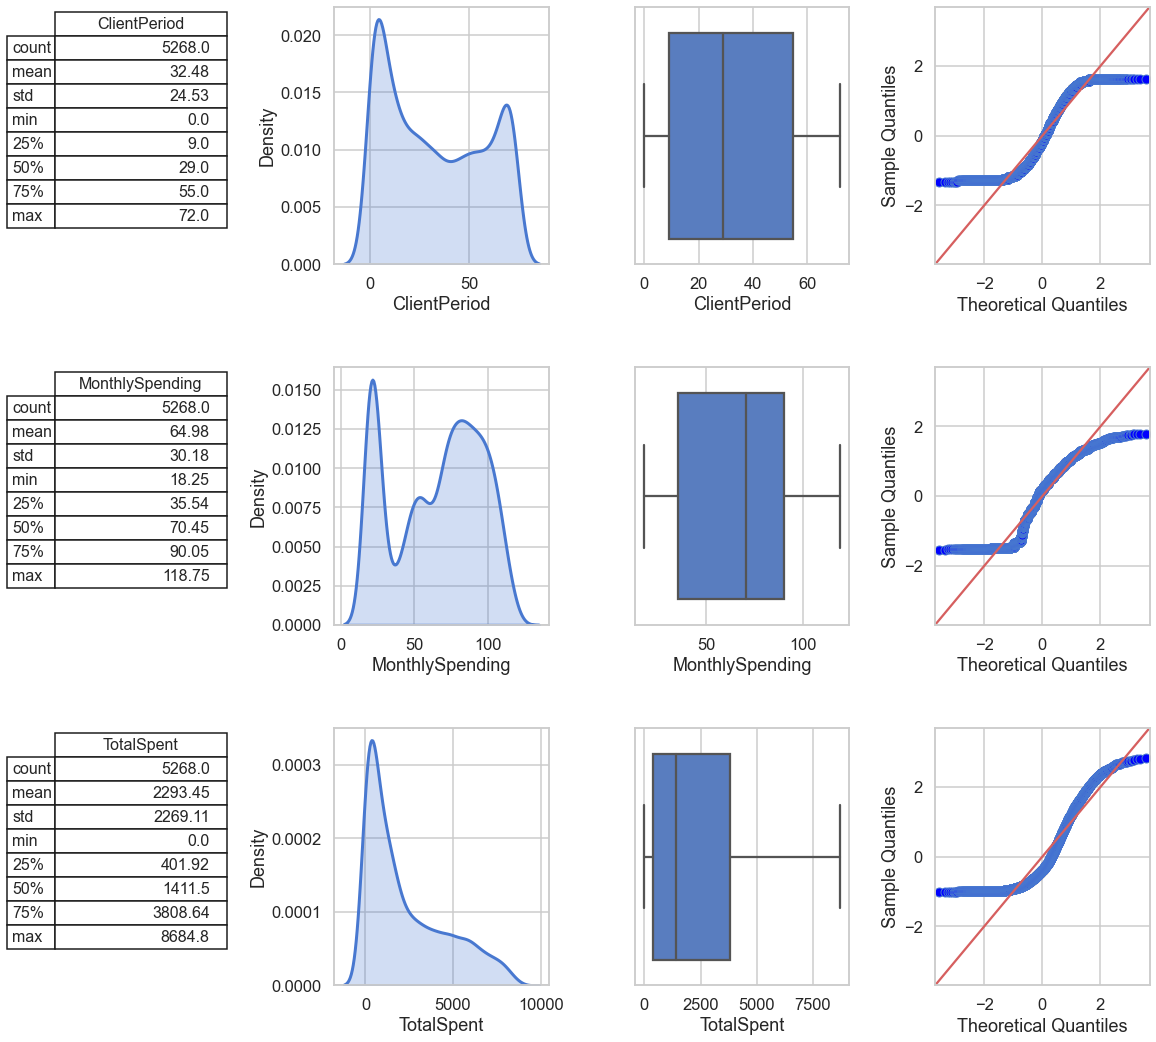

In [10]:
# YOUR CODE

df_descr = round(data[num_cols].describe(), 2)

f, ax = plt.subplots(3, 4, gridspec_kw={'hspace': 0.4, 'wspace': 0.4})
f.set_figheight(18)
f.set_figwidth(20)

for i, col in enumerate(num_cols):
    ax_xy = [ax[i,0],ax[i,1],ax[i,2],ax[i,3]]

    the_table = ax_xy[0].table(
        #Содержимое таблицы в виде списка списков строк
        cellText = [list(x) for x in df_descr.loc[:,col].values.reshape(df_descr.shape[0],1).astype('str')],
        rowLabels = list(df_descr.index),
        colLabels = [col],
        loc = 'upper center',
        colWidths = [0.8]
    )
    the_table.scale(1, 2)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(16)
    ax_xy[0].grid(False)
    ax_xy[0].axis('off')

    sns.kdeplot(
        x = col,
        data = data,
        shade = True,
        linewidth = 3,
        ax = ax_xy[1]
    )

    sns.boxplot(
        x = col,
        data = data,
        orient = 'h',
        ax = ax_xy[2]
    )
    sm.qqplot(data[col], line='45', fit=True, ax=ax_xy[3])

plt.show()

Распределения отклоняются от нормального, ввыбросов нет.

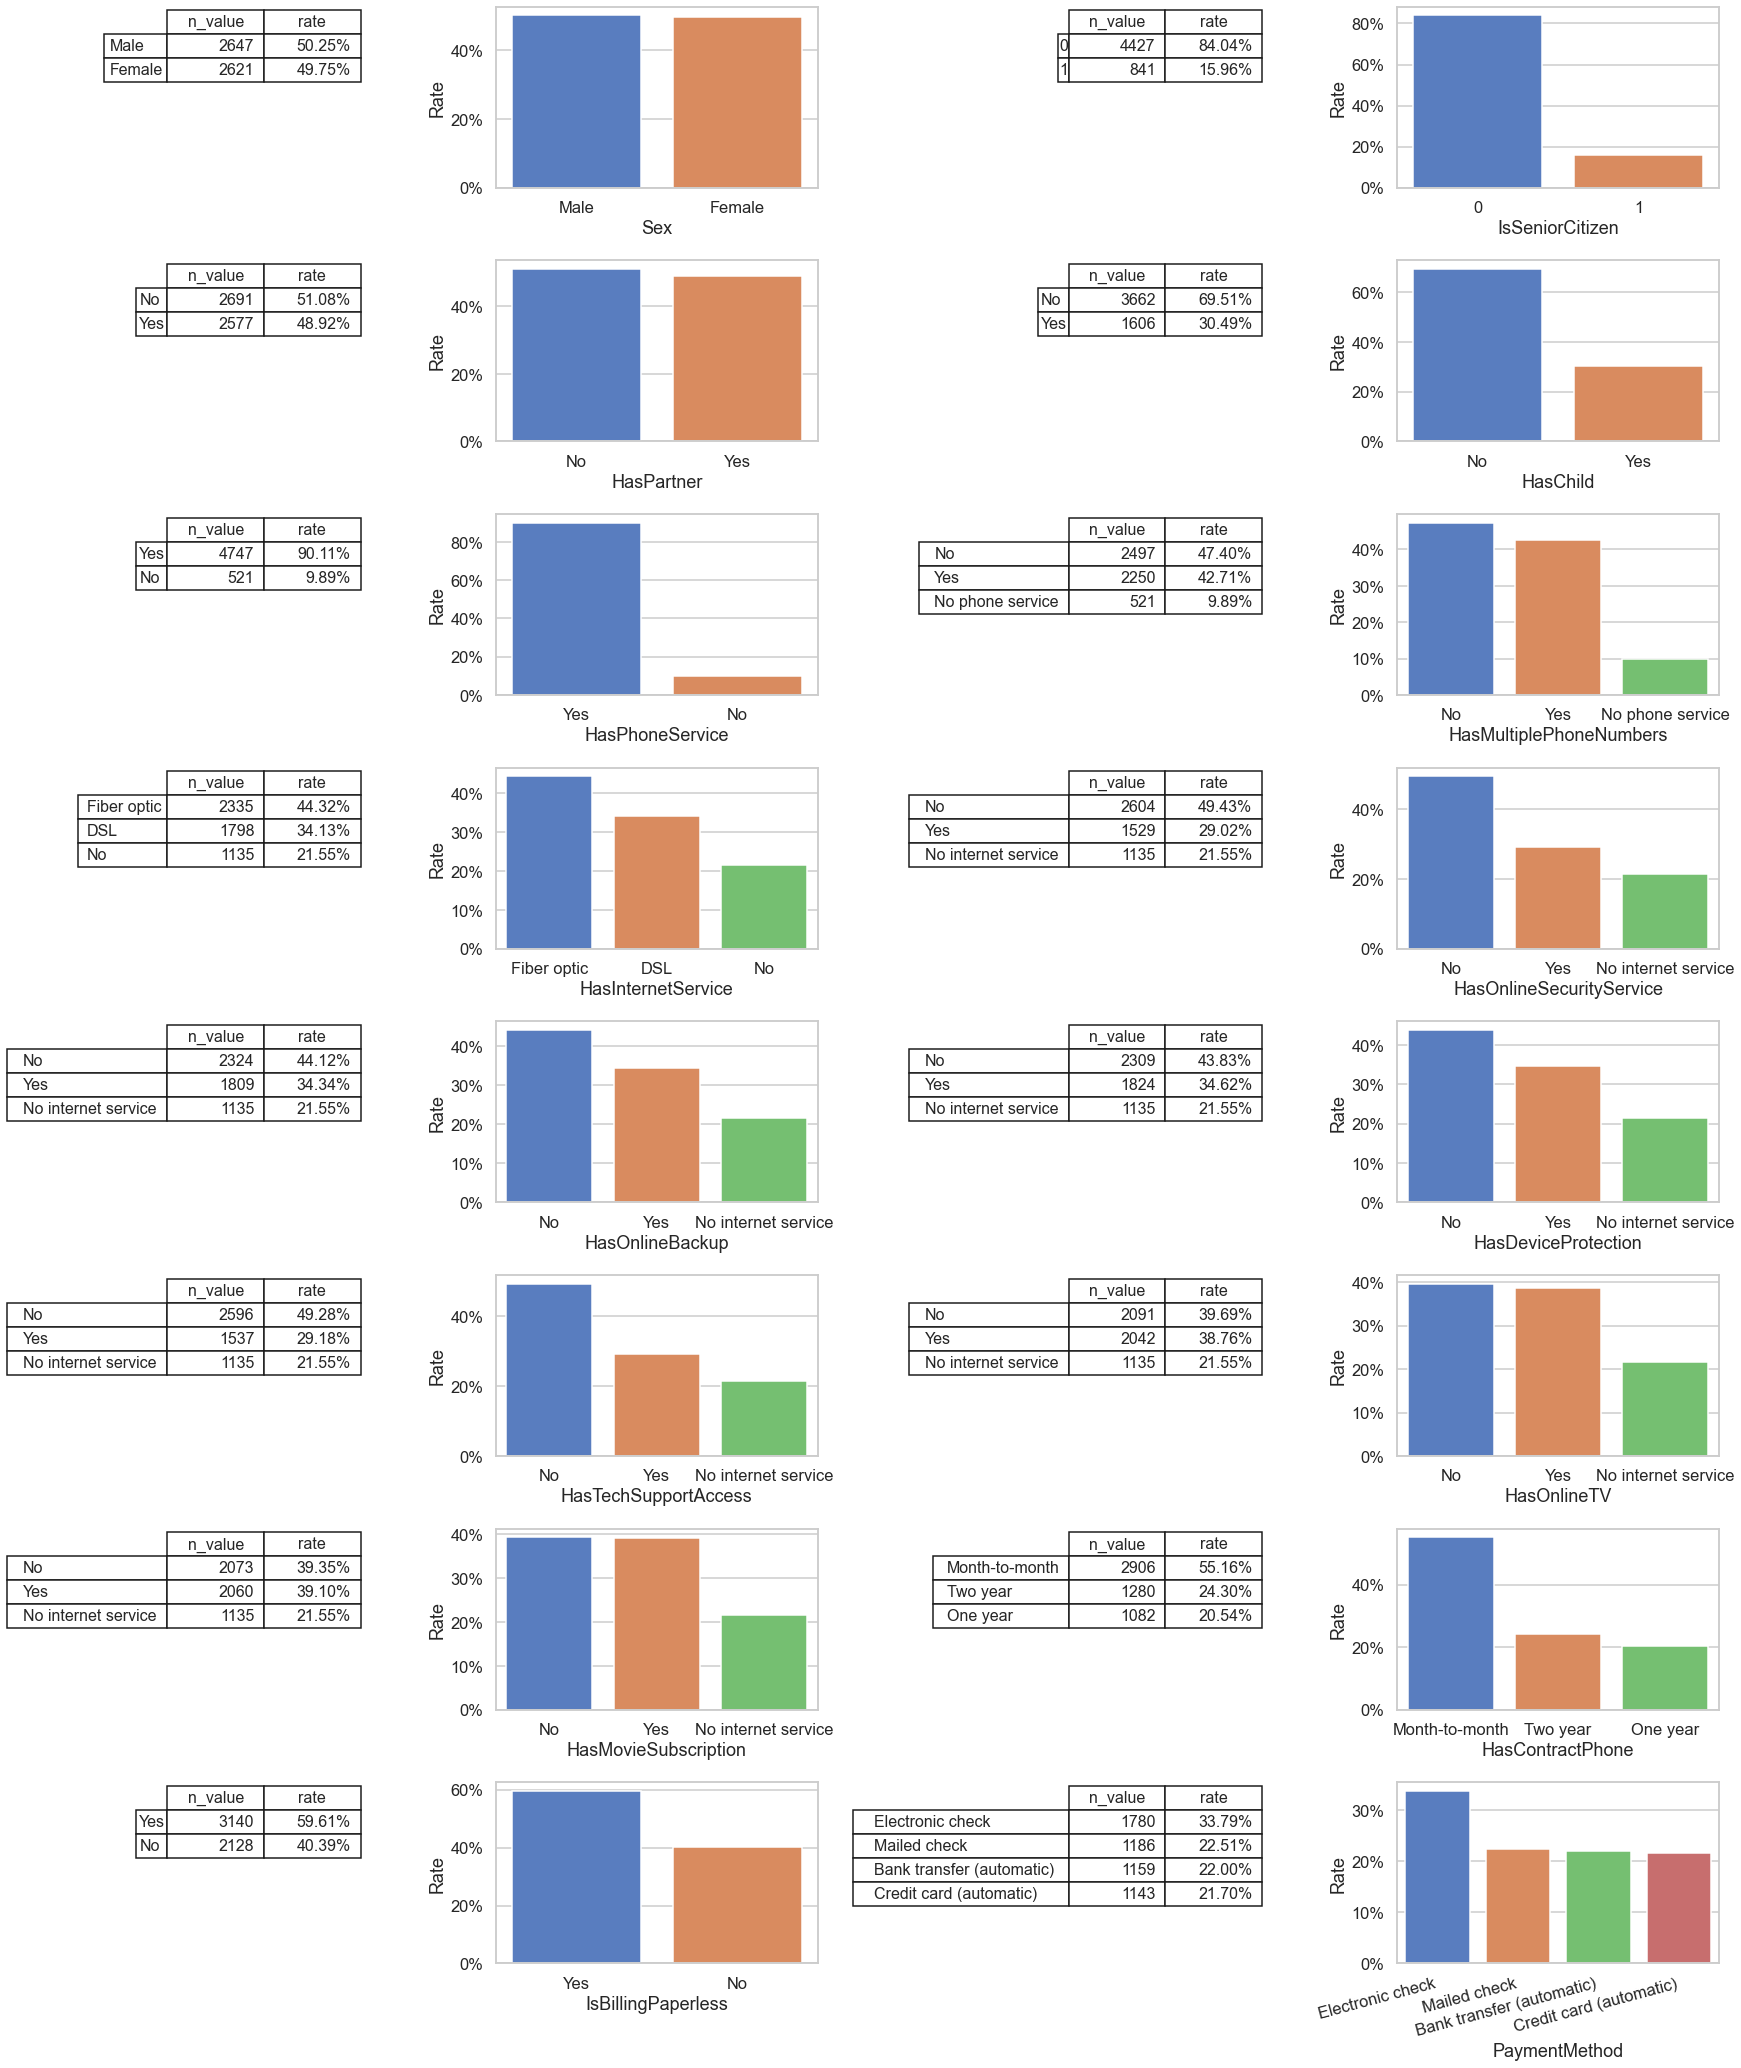

In [11]:
f, ax = plt.subplots(8, 4, gridspec_kw={'hspace': 0.4, 'wspace': 0.4})
f.set_figheight(36)
f.set_figwidth(30)

for i, col in enumerate(cat_cols):
    ax_xy = [ax[i//2, i%2 * 2],ax[i//2, i%2 * 2 + 1]]
    
    df_col_values = data[col].value_counts().to_frame('n_value')
    df_col_values['rate'] = (df_col_values['n_value'] / data.shape[0]).map(lambda x: '{:.2%}'.format(x))

    the_table = ax_xy[0].table(
        #Содержимое таблицы в виде списка списков строк
        cellText = [list(x) for x in df_col_values.values.astype('str')],
        rowLabels = list(df_col_values.index),
        colLabels = list(df_col_values.columns),
        loc = 'upper right',
        colWidths = [0.3, 0.3]
    )
    the_table.scale(1, 2)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(16)
    ax_xy[0].grid(False)
    ax_xy[0].axis('off')

    sns.barplot(
        x = df_col_values.index.astype('str'),
        y = df_col_values['n_value'] / data.shape[0],
        ax = ax_xy[1]
    )

    ticks_loc = ax_xy[1].get_yticks().tolist()
    ax_xy[1].yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
    ax_xy[1].set_yticklabels(['{:.0%}'.format(x) for x in ticks_loc])
    
    if col == 'PaymentMethod':
        ax_xy[1].set_xticklabels(
            ax_xy[1].get_xticklabels(), 
            rotation = 15, 
            horizontalalignment = 'right'
        )
    
    ax_xy[1].set(xlabel=col, ylabel='Rate')

plt.show()

In [12]:
print('Доля положительных классов: {:.0%}'.format(data[target_col].mean()))

Доля положительных классов: 26%


Дисбаланс есть, но 26% - это не 1%. Хороших результатов можно добиться без учёта такого дисбаланса, однако попробуем помимо прочего и class_weight='balanced' в логистической регрессии.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [13]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
X = data[feature_cols]
y = data[target_col]

Немного странное предложение испльзовать комбинацию LabelEncoder + OneHotEncoder: OHE работает и так. Вот для иллюстрации:

In [16]:
encoder = OneHotEncoder(drop='if_binary', sparse=False)
pd.DataFrame(encoder.fit_transform(data[cat_cols]))

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5264,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5265,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5266,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Напишем функции для получения пайплайна и поиска оптимальных гиперпараметров на кросс-валидации.

In [17]:
# YOUR CODE

def get_pipline(model, num_cols=num_cols, cat_cols=cat_cols):
    '''
    Создаёт пайплайн: преобразование признаков и модель. 
    '''
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(drop='if_binary', sparse=False), cat_cols),
                       ],
        remainder = 'passthrough',
        n_jobs = -1
    )
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

        
    return pipeline

In [18]:
def search_params(model, params, X, y):
    '''
    Ищет лучшие параметры модели с помощью GridSearch. Возвращает модель и ROC-AUC.
    '''
    
    kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    grid_search = GridSearchCV(
        model, params, 
        scoring = 'roc_auc', 
        cv = kf,
        n_jobs = -1
    )
    grid_search.fit(X, y)
    
    print('Лучшие параметры:', grid_search.best_params_)
    print('ROC-AUC = {:.3f}'.format(grid_search.best_score_))
    print()
    return grid_search.best_estimator_, grid_search.best_score_

Теперь с помощью этих функций можно искать параметры для любых моделей. Посмотрим на логистическую регрессию.

In [19]:
model_lr = LogisticRegression(random_state=42, solver='liblinear')

params_lr = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__class_weight': [None, 'balanced']
}

pipeline_lr = get_pipline(model_lr)
pipeline_lr, roc_auc_lr = search_params(pipeline_lr, params_lr, X, y)

Лучшие параметры: {'model__C': 10, 'model__class_weight': None, 'model__penalty': 'l2'}
ROC-AUC = 0.846



Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее значение метрики на кросс-валидации - 0,846 - достигается при С=10, penalty='l2' и class_weight=None.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [20]:
# YOUR CODE
from catboost import CatBoostClassifier

In [21]:
model_cb = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', random_seed=42, verbose=False)

params_cb = {
    'n_estimators': [800, 1000, 1200],
    'depth': [3, 5, 10],
    'learning_rate': np.arange(0.01, 0.02, 0.003)
}

model_cb, roc_auc_cb = search_params(model_cb, params_cb, X, y)

Лучшие параметры: {'depth': 3, 'learning_rate': 0.01, 'n_estimators': 1000}
ROC-AUC = 0.848



Бустинг незначительно превзошёл логистическую регрессию: 0,848 на кросс-валидации при depth=3, learning_rate=0,01 и n_estimators=1000. Добавим в качестве ещё одного признака предсказания логистической регрессии и попробуем заново найти гиперпараметры для бустинга.

In [22]:
X['lr_prob'] = pipeline_lr.predict_proba(X)[:,1]

model_cb = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', random_seed=42, verbose=False)
model_cb, roc_auc_cb = search_params(model_cb, params_cb, X, y)

Лучшие параметры: {'depth': 3, 'learning_rate': 0.01, 'n_estimators': 800}
ROC-AUC = 0.851



Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Бустинг с параметрами depth=3, learning_rate=0,01 и n_estimators=800 даёт на кросс-валидации 0,851 при условии использования в качестве дополнительного признака предсказаний логистической регресии.

# Предсказания

In [23]:
best_model = model_cb # какая-то предыдущая модель

In [24]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col=0)

In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

В тестовой выборке есть та же проблема, что и в обучающей: признак TotalSpent содержит не только числа. Сделаем аналогичные преобразования.

In [26]:
X_test.loc[X_test['TotalSpent'] == ' ', num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
177,0,19.85,
767,0,20.25,


In [27]:
X_test['TotalSpent'] = X_test['TotalSpent'].replace(' ', 0).astype('float')
X_test[cat_cols] = X_test[cat_cols].astype('category')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ClientPeriod              1761 non-null   int64   
 1   MonthlySpending           1761 non-null   float64 
 2   TotalSpent                1761 non-null   float64 
 3   Sex                       1761 non-null   category
 4   IsSeniorCitizen           1761 non-null   category
 5   HasPartner                1761 non-null   category
 6   HasChild                  1761 non-null   category
 7   HasPhoneService           1761 non-null   category
 8   HasMultiplePhoneNumbers   1761 non-null   category
 9   HasInternetService        1761 non-null   category
 10  HasOnlineSecurityService  1761 non-null   category
 11  HasOnlineBackup           1761 non-null   category
 12  HasDeviceProtection       1761 non-null   category
 13  HasTechSupportAccess      1761 non-null   catego

Добавим признак с вероятностями, которые даёт логистическая регрессия.

In [28]:
X_test['lr_prob'] = pipeline_lr.predict_proba(X_test)[:,1]

Теперь можно перейти к предсказаниям. Для пяти разных random state сделаем по десять разбиений обучающей выборки, каждый раз будем заново обучать лучшую модель на 90% данных и получать предсказания. Итоговый результат - среднее из 50-и разных предсказаний.

In [29]:
submission['Churn'] -= submission['Churn']
kFold_random_state = [34, 666, 13, 2020, 42]

for random_state in kFold_random_state:
    kf = StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True)

    for train_index, valid_index in kf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y[train_index]
        
        best_model.fit(X_train, y_train)
        submission['Churn'] += best_model.predict_proba(X_test)[:,1] / 50

In [30]:
submission.to_csv('./my_submission.csv')

На Kaggle я Irina Martina и мой результат 0.85334.

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.